This notebook is the first tutorial to illustrate feature selection. More complex solution is represented in other notebook. First solution illustrates how feature solution with **Random Forest**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
df.columns = ['ClassLabel','Alcolhol','MalicAcid','Ash','AlcalinityOfAsh','Magnesium','TotalPhenols','Flavanoids',\
              'NonflavanoidPhenols','Proanthocyans','ColorIntensity','hue','dilutedWines','Proline']
df.head()

,ClassLabel,Alcolhol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyans,ColorIntensity,hue,dilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# generate train/ testset
X, y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [3]:
feat_labels =df.columns[1:]
rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [4]:
importances =rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [5]:
for f in range(X_train.shape[1]):
    print("%2d) %- *s %f" % (f+1,30,feat_labels[f], importances[indices[f]]))

 1) Alcolhol                       0.194819
 2) MalicAcid                      0.164348
 3) Ash                            0.145228
 4) AlcalinityOfAsh                0.119075
 5) Magnesium                      0.088747
 6) TotalPhenols                   0.080266
 7) Flavanoids                     0.061579
 8) NonflavanoidPhenols            0.039190
 9) Proanthocyans                  0.029782
10) ColorIntensity                 0.023107
11) hue                            0.022962
12) dilutedWines                   0.016638
13) Proline                        0.014258


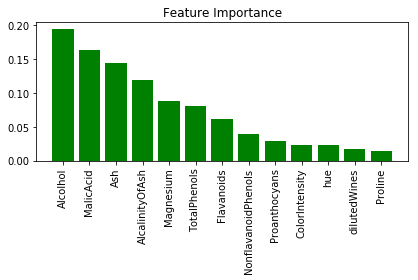

In [6]:
import matplotlib.pyplot as plt
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],color='green',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

The different features in the Wine dataset are ranked by their relative importance. Note that feature importances are normalized so that they sum up to 1.0. From the plot we can see that the alcohol content of wine is the most discriminative feature in the dataset based on the average impurity decrease in the 100 decision trees.

In [37]:
X_train.shape,y_train.shape

((105, 4), (105,))

### 1. Dimensionality reduction with PCA
We illustrate a common approach for dimension reduction with PCA. Other advance tachnique as autoencoder will be presented later

In [39]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [40]:
X_train_std.shape

(105, 4)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca= PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [42]:
X_train_pca.shape

(105, 2)

In [8]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(lr,X_test_pca,y_test,cv=5).mean()
print(acc)

0.963333333333


### 2. Dimension reduction with Linear Discriminant Analysis (LDA) 
 LDA finds a linear combination of features that characterizes or separates classes. The resulting combination is used for dimensionality reduction before classification. LDA is supervised model while PCA is unsupervised. 
LDA focuses on maximizing the separability among known categories. Read [more]("http://bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_2_Linear_Discriminant_Analysis.php")
 

In [54]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [56]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda =lda.fit(X_train_std,y_train).transform(X_train_std)

In [57]:
lr = LogisticRegression()
lr.fit(X_train_lda,y_train)
acc = cross_val_score(lr,X_test_pca,y_test,cv=5).mean()
print(acc)

0.831565656566


## visualization of comparison between PCA and LDA on iris dataset 

In [15]:
X_r = pca.fit_tranesform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 =lda.fit(X,y).transform(X)
print("explain variance ratio (first two components) %s" %str(pca.explained_variance_ratio_))

explain variance ratio (first two components) [ 0.92461621  0.05301557]


Populating the interactive namespace from numpy and matplotlib


C:\Users\trisi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


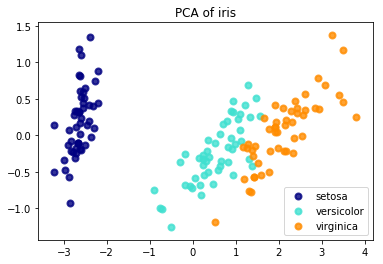

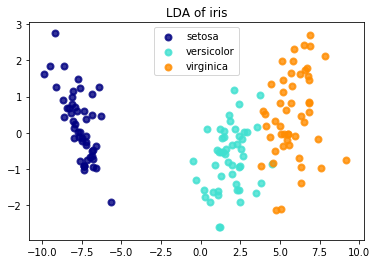

In [16]:
lw =2
%pylab inline
plt.figure()
colors = ['navy','turquoise','darkorange']
for  color,i, target_name in zip(colors, [0,1,2],target_names) :
    plt.scatter(X_r[y== i,0], X_r[y== i,1], color=color, alpha=0.8,lw=lw, label=target_name)
    
plt.legend(loc='best',shadow=False, scatterpoints=1)  
plt.title("PCA of iris")

plt.figure()
for  color,i, target_name in zip(colors, [0,1,2],target_names) :
    plt.scatter(X_r2[y== i,0], X_r2[y== i,1], color=color, alpha=0.8,lw=lw, label=target_name)
    
plt.legend(loc='best',shadow=False, scatterpoints=1)  
plt.title("LDA of iris")

In [17]:
print(target_names)

['setosa' 'versicolor' 'virginica']


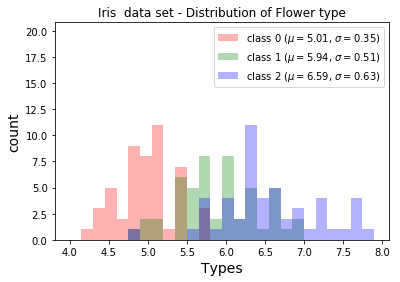

In [18]:
from math import floor, ceil 

# the order of the colors for each histogram
colors = ('red', 'green', 'blue')

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.15)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,0], bins=bins)[0])

for label,color in zip(np.unique(y), colors):
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    hist(X[:,0][y == label], bins=bins, alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), color=color)

ylim([0, max_bin*1.3])
title('Iris  data set - Distribution of Flower type')
xlabel('Types', fontsize=14)
ylabel('count', fontsize=14)
legend(loc='upper right')

show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### A quick check on classes distribution. [extra]("http://bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_2_Linear_Discriminant_Analysis.php")

In [20]:
print('Class label distribution on train set: ' ,np.bincount(y_train)[1:]/len(y_train))
print('Class label distribution on test: %s', np.bincount(y_test)[1:]/len(y_test))

Class label distribution on train set:  [ 0.3047619   0.37142857]
Class label distribution on test: %s [ 0.4         0.24444444]


### 3. Dimension Reduction with Factor Analysis
Factor Analysis sssumes that there are implicit features responsible representing the dataset.

In [22]:
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_iris

In [45]:
# Let reconsider the original data wine, after scaling X_train_std, X_test_std
fa = FactorAnalysis(n_components=2)
X_train_fa = fa.fit_transform(X_train_std)
X_test_fa = fa.transform(X_test_std)

In [46]:
X_train_fa.shape

(105, 2)

In [47]:
lr = LogisticRegression()
lr.fit(X_train_fa,y_train)
acc_fa = cross_val_score(lr,X_test_fa,y_test,cv=5).mean()
print(acc_fa)

0.691161616162


#### Summary: 
The result implies that Factor Analys's solution is not a good choice with n=2. We assume that there are M important features    and the linear combination of these features (plus noise) results in N dimension dataset.


### 4. Decomposition with Dictionary Learning

In [61]:
from sklearn.decomposition import DictionaryLearning


In [64]:
# We use three components in represent the three target class
dl = DictionaryLearning(3)
X_train_dl = dl.fit_transform(X_train_std)
X_test_dl  = dl.transform(X_test_std)

In [65]:
lr = LogisticRegression()
lr.fit(X_train_dl,y_train)
acc_dl = cross_val_score(lr,X_test_dl,y_test,cv=5).mean()
print(acc_dl)

0.806565656566


### 5. Dimension resuction with t-SNE
T-SNE (t-distributed stochastic neighbor embedding) developed by Laurens van der Maaten and Geoffrey Hinton [paper](http://www.jmlr.org/papers/v9/vandermaaten08a.html). This technique is known as  nonlinear dimensionality reduction (or manifold learning) which is active reasearch  and can automatically recover a hidden structure in a high-dimensional dataset.
[t-SNE](https://github.com/oreillymedia/t-SNE-tutorial) is recommended to apply following PCA or Truncated SVD.   
t-SNE converts Euclidean distances between pairs of points in the dataset into probabilities. Around each points there is a Guassian centeres at that point, and the probability distribution represents the chance  of any other point being a neighbor. Points very far away from each other have a loew chance of begin neighbors. Here , we have turned point localitions into distances and then probebilities. t-SNE maintains the local structures very well by utilizing the probebilities of two points being neighbors.


In [66]:
from sklearn.manifold import TSNE, MDS, Isomap

In [70]:
# Note, TSNE prodives parameter init ='pca', otherwise we can process dimension reduction with PCA separate as follows
tsne = TSNE(learning_rate =200,init='pca', random_state=0)
X_train_tsne = tsne.fit_transform(X_train_std)
X_test_tsne = tsne.fit_transform(X_test_std)

In [71]:
lr = LogisticRegression()
lr.fit(X_train_tsne,y_train)
acc_tsne = cross_val_score(lr,X_test_tsne,y_test,cv=5).mean()
print(acc_tsne)

0.737121212121


## indicated number of dimension

In [75]:
tsne = TSNE(n_components=2,init='pca', random_state=0)
X_train_tsne = tsne.fit_transform(X_train_std)
X_test_tsne = tsne.fit_transform(X_test_std)

In [76]:
lr = LogisticRegression()
lr.fit(X_train_tsne,y_train)
acc_tsne = cross_val_score(lr,X_test_tsne,y_test,cv=5).mean()
print(acc_tsne)

0.737121212121


### 6. Dimension reduction with ISo map

In [78]:
iso = Isomap(n_components =2)
X_train_isomap = iso.fit_transform(X_train_std)
X_test_isomap = iso.fit_transform(X_test_std)

In [79]:
lr = LogisticRegression()
lr.fit(X_train_isomap,y_train)
acc_isomap = cross_val_score(lr,X_test_isomap,y_test,cv=5).mean()
print(acc_isomap)

0.530050505051


### 7. Dimension reduction with Multidimensional scaling

In [81]:
mds = MDS(n_components =2)
X_train_mds = mds.fit_transform(X_train_std)
X_test_mds = mds.fit_transform(X_test_std)

In [82]:
lr = LogisticRegression()
lr.fit(X_train_isomap,y_train)
acc_mds = cross_val_score(lr,X_test_mds,y_test,cv=5).mean()
print(acc_mds)

0.809343434343
